In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
Boa_data  = pd.read_excel("./data/BANKS AD DATA.xlsx",sheet_name="BOA")
Cbe_data  = pd.read_excel("./data/BANKS AD DATA.xlsx",sheet_name="CBE")
GlobalBank_data  = pd.read_excel("./data/BANKS AD DATA.xlsx",sheet_name="Global Bank")
Wegagen_data  = pd.read_excel("./data/BANKS AD DATA.xlsx",sheet_name="Wegagen")

In [36]:
# Assuming your dataset is named 'dataset'
GlobalBank_data['Date'] = pd.to_datetime(GlobalBank_data['Date'], format='%m/%d/%Y').dt.strftime('%d/%m/%y')

In [39]:
# Convert the date to datetime format
Wegagen_data['Date'] = pd.to_datetime(Wegagen_data['Date']).dt.strftime('%d/%m/%y')
Boa_data['Date'] = pd.to_datetime(Boa_data['Date']).dt.strftime('%d/%m/%y')
Cbe_data['Date'] = pd.to_datetime(Cbe_data['Date']).dt.strftime('%d/%m/%y')

C:\Users\huawei\AppData\Local\Temp\ipykernel_4112\1282085488.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Wegagen_data['Date'] = pd.to_datetime(Wegagen_data['Date']).dt.strftime('%d/%m/%y')
C:\Users\huawei\AppData\Local\Temp\ipykernel_4112\1282085488.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Boa_data['Date'] = pd.to_datetime(Boa_data['Date']).dt.strftime('%d/%m/%y')
C:\Users\huawei\AppData\Local\Temp\ipykernel_4112\1282085488.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Cbe_data['Date'] = pd.to_datetime(Cbe_data['Date']).dt.strftime('%d/%m/%y')


In [38]:
print(Cbe_data['Date'] )

0              16/11/2023
1     2023-02-11 00:00:00
2     2023-02-10 00:00:00
3     2023-03-08 00:00:00
4               21/7/2023
5               16/7/2023
6     2023-09-07 00:00:00
7     2023-06-07 00:00:00
8     2023-02-07 00:00:00
9               18/6/2023
10    2023-08-06 00:00:00
11    2023-04-06 00:00:00
12    2023-01-06 00:00:00
13              28/5/2023
14              25/5/2023
15              21/5/2023
16              18/5/2023
17              14/5/2023
18    2023-11-05 00:00:00
19    2023-08-05 00:00:00
20    2023-07-05 00:00:00
21              23/4/2023
22    2023-07-02 00:00:00
23    2022-01-08 00:00:00
24    2021-06-09 00:00:00
25              17/2/2021
26    2020-11-10 00:00:00
27    2020-09-04 00:00:00
28    2019-04-12 00:00:00
29             24/10/2019
30    2019-10-10 00:00:00
31    2019-10-04 00:00:00
32              29/7/2019
33              20/3/2019
34              18/3/2019
35              17/3/2019
36              16/3/2019
37              16/3/2019
38          

In [9]:
# Analysis 1: Compare the total number of views across the datasets
total_views = {
    'Wegagen': Wegagen_data['View'].sum(),
    'Global Bank': GlobalBank_data['View'].sum(),
    'CBE': Cbe_data['View'].sum(),
    'BOA': Boa_data['View'].sum()
}
print("Total Views:")
for bank, views in total_views.items():
    print(f"{bank}: {views}")
# Convert the dictionary to a DataFrame
total_views_df = pd.DataFrame.from_dict(total_views, orient='index', columns=['Total Views'])



Total Views:
Wegagen: 1286900
Global Bank: 4812700
CBE: 8962800
BOA: 4764500


In [12]:
# Analysis 2: Compare the average views per post for each dataset
avg_views_per_post = {
    'Wegagen': Wegagen_data['View'].mean(),
    'Global Bank': GlobalBank_data['View'].mean(),
    'CBE': Cbe_data['View'].mean(),
    'BOA': Boa_data['View'].mean()
}
print("\nAverage Views per Post:")
for bank, avg_views in avg_views_per_post.items():
    print(f"{bank}: {avg_views:.2f}")
    avg_views_df = pd.DataFrame.from_dict(avg_views_per_post, orient='index', columns=['Average Views per Post'])


Average Views per Post:
Wegagen: 257380.00
Global Bank: 267372.22
CBE: 203700.00
BOA: 226880.95


In [6]:
# Analysis 3: Compare the number of posts made during different times of the day
time_of_day_counts = {
    'Wegagen': Wegagen_data['Time of day'].value_counts(),
    'Global Bank': GlobalBank_data['Time of day'].value_counts(),
    'CBE': Cbe_data['Time of day'].value_counts(),
    'BOA': Boa_data['Time of day'].value_counts()
}
print("\nNumber of Posts by Time of Day:")
for bank, time_counts in time_of_day_counts.items():
    print(f"{bank}:\n{time_counts}")


Number of Posts by Time of Day:
Wegagen:
Time of day
night      3
morning    1
day        1
Name: count, dtype: int64
Global Bank:
Time of day
Night        8
afternoon    5
Morning      5
Name: count, dtype: int64
CBE:
Time of day
afternoon    21
evening       9
morning       9
night         5
Name: count, dtype: int64
BOA:
Time of day
afternoon    8
evening      7
night        3
morning      3
Name: count, dtype: int64


In [40]:
# Analysis 4: Compare the number of posts made on different days of the week
Wegagen_data['Date'] = pd.to_datetime(Wegagen_data['Date'])
GlobalBank_data['Date'] = pd.to_datetime(GlobalBank_data['Date'])
Cbe_data['Date'] = pd.to_datetime(Cbe_data['Date'])
Boa_data['Date'] = pd.to_datetime(Boa_data['Date'])

wegagen_day_of_week_counts = Wegagen_data['Date'].dt.day_name().value_counts()
globalbank_day_of_week_counts = GlobalBank_data['Date'].dt.day_name().value_counts()
cbe_day_of_week_counts = Cbe_data['Date'].dt.day_name().value_counts()
boa_day_of_week_counts = Boa_data['Date'].dt.day_name().value_counts()

print("\nNumber of Posts by Day of Week:")
print("Wegagen:")
print(wegagen_day_of_week_counts)
print("\nGlobal Bank:")
print(globalbank_day_of_week_counts)
print("\nCBE:")
print(cbe_day_of_week_counts)
print("\nBOA:")
print(boa_day_of_week_counts)


Number of Posts by Day of Week:
Wegagen:
Date
Monday       4
Wednesday    1
Name: count, dtype: int64

Global Bank:
Date
Wednesday    6
Saturday     5
Friday       4
Tuesday      2
Sunday       1
Name: count, dtype: int64

CBE:
Date
Thursday     12
Sunday       12
Monday        6
Saturday      6
Wednesday     4
Friday        2
Tuesday       2
Name: count, dtype: int64

BOA:
Date
Thursday     9
Tuesday      5
Wednesday    5
Friday       1
Monday       1
Name: count, dtype: int64


C:\Users\huawei\AppData\Local\Temp\ipykernel_4112\3909941241.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Wegagen_data['Date'] = pd.to_datetime(Wegagen_data['Date'])
C:\Users\huawei\AppData\Local\Temp\ipykernel_4112\3909941241.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  GlobalBank_data['Date'] = pd.to_datetime(GlobalBank_data['Date'])
C:\Users\huawei\AppData\Local\Temp\ipykernel_4112\3909941241.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Cbe_data['Date'] = pd.to_datetime(Cbe_data['Date'])
C:\Users\huawei\AppData\Local\Temp\ipykernel_4112\3909941241.py

In [42]:
# Analysis 5: Compare the average views per post for each bank on specific days
specific_dates = ['2023-07-21', '2023-09-26', '2022-03-17']

for date in specific_dates:
    avg_views_specific_date = {
        'Wegagen': Wegagen_data.loc[Wegagen_data['Date'] == date, 'View'].mean(),
        'Global Bank': GlobalBank_data.loc[GlobalBank_data['Date'] == date, 'View'].mean(),
        'CBE': Cbe_data.loc[Cbe_data['Date'] == date, 'View'].mean(),
        'BOA': Boa_data.loc[Boa_data['Date'] == date, 'View'].mean()
    }
    print(f"\nAverage Views per Post on {date}:")
    for bank, avg_views in avg_views_specific_date.items():
        print(f"{bank}: {avg_views:.2f}")


Average Views per Post on 2023-07-21:
Wegagen: nan
Global Bank: nan
CBE: 307900.00
BOA: nan

Average Views per Post on 2023-09-26:
Wegagen: nan
Global Bank: nan
CBE: nan
BOA: 239800.00

Average Views per Post on 2022-03-17:
Wegagen: nan
Global Bank: nan
CBE: nan
BOA: 249700.00


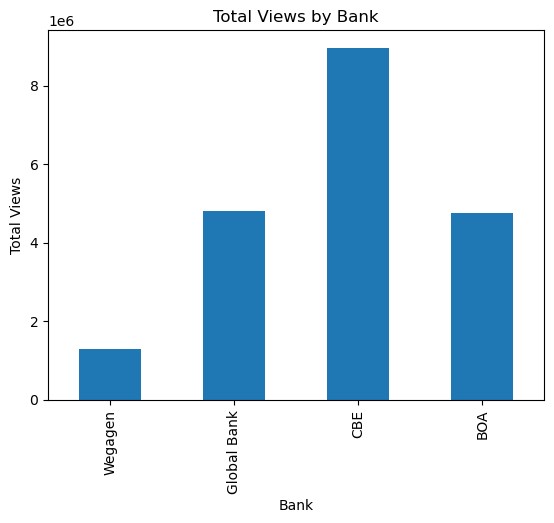

In [10]:
# Plot a bar chart
total_views_df.plot(kind='bar', legend=False)
plt.xlabel('Bank')
plt.ylabel('Total Views')
plt.title('Total Views by Bank')
plt.show()

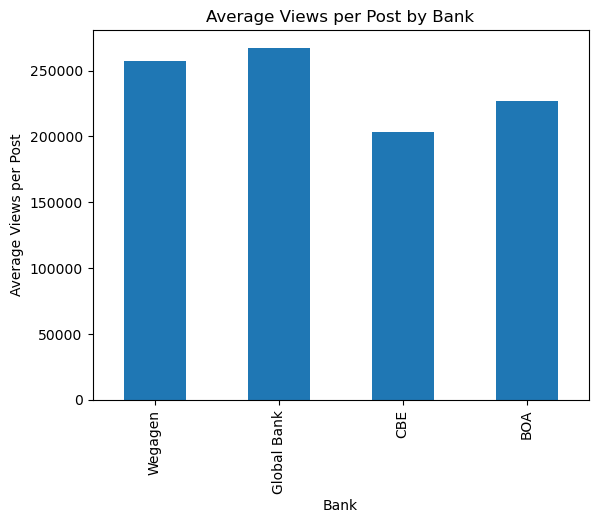

In [13]:
# Plot a bar chart
avg_views_df.plot(kind='bar', legend=False)
plt.xlabel('Bank')
plt.ylabel('Average Views per Post')
plt.title('Average Views per Post by Bank')
plt.show()

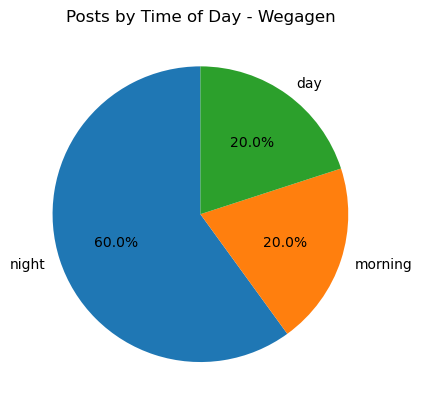

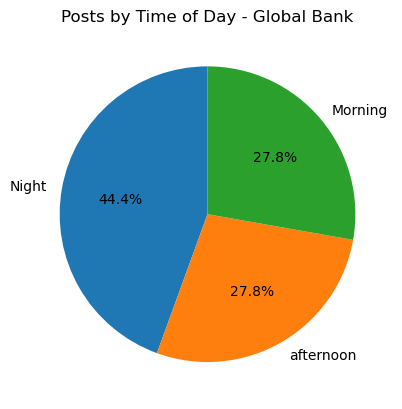

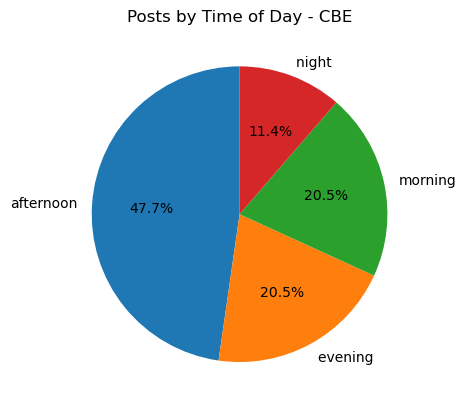

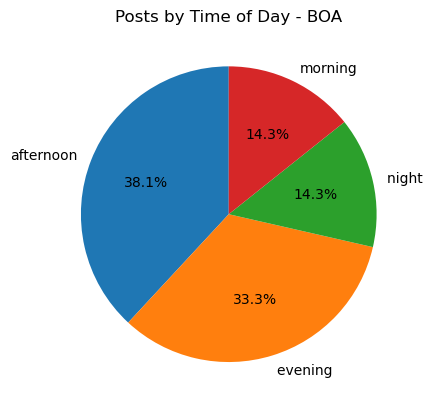

In [14]:
# Plot pie charts for each bank
for bank, time_counts in time_of_day_counts.items():
    time_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f"Posts by Time of Day - {bank}")
    plt.ylabel('')
    plt.show()

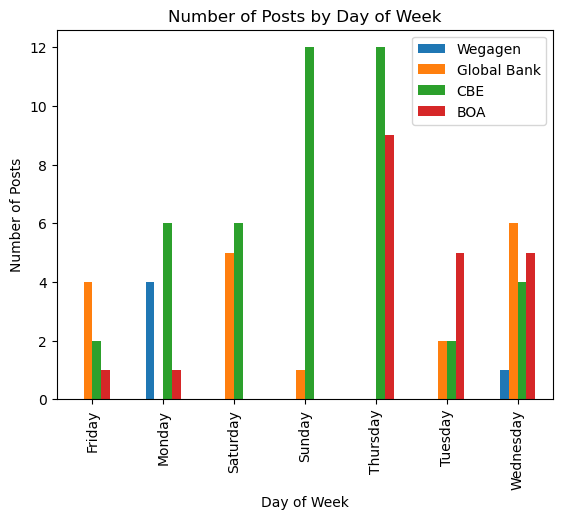

In [43]:
# Combine the day of week counts into a single DataFrame
day_of_week_counts_df = pd.DataFrame({
    'Wegagen': wegagen_day_of_week_counts,
    'Global Bank': globalbank_day_of_week_counts,
    'CBE': cbe_day_of_week_counts,
    'BOA': boa_day_of_week_counts
})

# Plot a bar chart
day_of_week_counts_df.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Posts')
plt.title('Number of Posts by Day of Week')
plt.show()